In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_dir = "D://LP-4-DL-DataSet//cifar-10-img//cifar-10-img//train"
test_dir = "D://LP-4-DL-DataSet//cifar-10-img//cifar-10-img/test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [33]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [34]:

weight_path="D://LP-4-DL-DataSet//vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
pretrained_model=VGG16(include_top=False,weights=weight_path ,input_shape=(32,32,3))

In [35]:
for i in pretrained_model.layers:
    i.trainable=False

In [36]:
x=keras.layers.Flatten()(pretrained_model.output)
x=keras.layers.Dense(256,activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(256,activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
predict=keras.layers.Dense(10,activation='softmax')(x)



In [37]:
model =keras.Model(inputs=pretrained_model.input,outputs=predict)

In [38]:
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,  epochs=10 ,batch_size=64 , validation_data=(x_test,y_test))

Epoch 1/10
79/79 [==============================] - 9s 106ms/step - loss: 1.8987 - accuracy: 0.3110 - val_loss: 1.5399 - val_accuracy: 0.4720
Epoch 2/10
79/79 [==============================] - 8s 107ms/step - loss: 1.5312 - accuracy: 0.4582 - val_loss: 1.4359 - val_accuracy: 0.5140
Epoch 3/10
79/79 [==============================] - 8s 102ms/step - loss: 1.3873 - accuracy: 0.5040 - val_loss: 1.3273 - val_accuracy: 0.5460
Epoch 4/10
79/79 [==============================] - 8s 107ms/step - loss: 1.2982 - accuracy: 0.5376 - val_loss: 1.2883 - val_accuracy: 0.5540
Epoch 5/10
79/79 [==============================] - 8s 106ms/step - loss: 1.2270 - accuracy: 0.5572 - val_loss: 1.2939 - val_accuracy: 0.5500
Epoch 6/10
79/79 [==============================] - 8s 107ms/step - loss: 1.1646 - accuracy: 0.5852 - val_loss: 1.2754 - val_accuracy: 0.5560
Epoch 7/10
79/79 [==============================] - 8s 102ms/step - loss: 1.1005 - accuracy: 0.6168 - val_loss: 1.2560 - val_accuracy: 0.5630
Epoch 

In [39]:
weight_path="D://LP-4-DL-DataSet//vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
pretrained_model=VGG16(include_top=False,weights=weight_path,input_shape=(32,32,3))

In [40]:
for i in pretrained_model.layers:
    i.trainable=False

In [41]:
for i in pretrained_model.layers[len(pretrained_model.layers)-4:]:
    i.trainable=True

In [47]:
x=keras.layers.Flatten()(pretrained_model.output)
x=keras.layers.Dense(128,activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(256,activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
predict=keras.layers.Dense(10,activation='softmax')(x)


In [48]:
model = keras.Model(inputs=pretrained_model.input,outputs=predict)

In [51]:
model.compile( optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [52]:
model.fit(x_train,y_train ,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
157/157 [==============================] - 43s 266ms/step - loss: 1.8564 - accuracy: 0.3086 - val_loss: 1.4315 - val_accuracy: 0.4650
Epoch 2/10
157/157 [==============================] - 45s 288ms/step - loss: 1.3206 - accuracy: 0.5338 - val_loss: 1.4594 - val_accuracy: 0.5300
Epoch 3/10
157/157 [==============================] - 45s 287ms/step - loss: 1.1133 - accuracy: 0.6248 - val_loss: 1.1175 - val_accuracy: 0.6380
Epoch 4/10
157/157 [==============================] - 42s 271ms/step - loss: 0.9300 - accuracy: 0.6924 - val_loss: 1.1291 - val_accuracy: 0.6340
Epoch 5/10
157/157 [==============================] - 42s 266ms/step - loss: 0.8284 - accuracy: 0.7174 - val_loss: 1.1173 - val_accuracy: 0.6590
Epoch 6/10
157/157 [==============================] - 42s 269ms/step - loss: 0.6749 - accuracy: 0.7724 - val_loss: 1.1493 - val_accuracy: 0.6550
Epoch 7/10
157/157 [==============================] - 42s 267ms/step - loss: 0.6284 - accuracy: 0.7876 - val_loss: 1.1473 - val_ac

In [53]:
labels =list(test_generator.class_indices.keys())

In [54]:
print(labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [55]:
predicted_values=model.predict(x_test)

32/32 [==============================] - 2s 52ms/step


actual:  automobile
predicted:  automobile


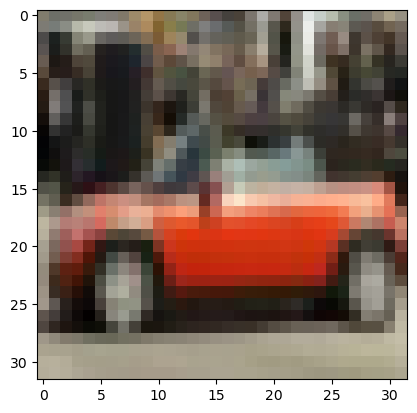

In [60]:
n=250
plt.imshow(x_test[n])
print('actual: ', labels[np.argmax(y_test[n])])
print('predicted: ', labels[np.argmax(predicted_values[n])])